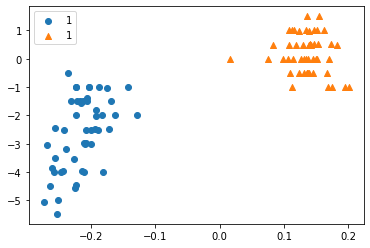

In [3]:
import glob, os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

# ds = [1, 6, 7, 8, 9]
ds = [1, 6, 7]
# 7最好
for d in ds:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_cola_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_cola_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE']), df_f['RSSI'] - df_t['RSSI'])
    
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_colanosugar_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_colanosugar_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE']), df_f['RSSI'] - df_t['RSSI'], marker='^')
plt.legend([1, 1, 6, 6, 7, 7, 8, 8, 9, 9])

In [15]:
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
matls = ['cola', 'colanosugar']
d_p = []
d_r = []
f = []
y = []
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    
X = np.column_stack((d_p, d_r, f))

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)

GaussianNB()

cola ['cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola']
Correct 1.0
-------------------------------
colanosugar ['cola' 'colanosugar' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'colanosugar' 'colanosugar' 'cola' 'cola' 'cola' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'cola'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'cola'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'cola' 'cola' 'cola' 'cola' 'colanosugar' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola']
Correct 0.36
-------------------------------
68 100 0.68


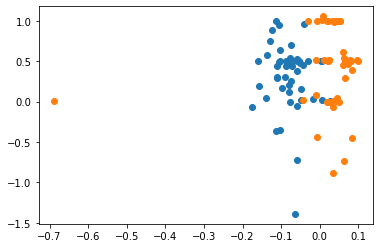

In [ ]:
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd9_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd9_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
    result = model.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))

#     result = tree.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')

print(correctcnt, cnt, correctcnt/cnt)

In [10]:
data = {}

df_f = pd.read_csv(os.path.join(folder_clean, 'd1_cola_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd1_cola_t_kde.csv'))
data['d1_cola_rssi_f'] = df_f['RSSI'].values
data['d1_cola_rssi_t'] = df_t['RSSI'].values
data['d1_cola_phase_f'] = df_f['PHASE'].values
data['d1_cola_phase_t'] = df_t['PHASE'].values

df_f = pd.read_csv(os.path.join(folder_clean, 'd1_colanosugar_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd1_colanosugar_t_kde.csv'))
data['d1_colanosugar_rssi_f'] = df_f['RSSI'].values
data['d1_colanosugar_rssi_t'] = df_t['RSSI'].values
data['d1_colanosugar_phase_f'] = df_f['PHASE'].values
data['c1_colanosugar_phase_t'] = df_t['PHASE'].values

df_f = pd.read_csv(os.path.join(folder_clean, 'd6_colanosugar_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd6_colanosugar_t_kde.csv'))
data['d6_cola_rssi_f'] = df_f['RSSI'].values
data['d6_cola_rssi_t'] = df_t['RSSI'].values
data['d6_cola_phase_f'] = df_f['PHASE'].values
data['d6_cola_phase_t'] = df_t['PHASE'].values

df_f = pd.read_csv(os.path.join(folder_clean, 'd6_colanosugar_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd6_colanosugar_t_kde.csv'))
data['d6_colanosugar_rssi_f'] = df_f['RSSI'].values
data['d6_colanosugar_rssi_t'] = df_t['RSSI'].values
data['d6_colanosugar_phase_f'] = df_f['PHASE'].values
data['d6_colanosugar_phase_t'] = df_t['PHASE'].values

df_f = pd.read_csv(os.path.join(folder_clean, 'd7_cola_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd7_cola_t_kde.csv'))
data['cola_rssi_f'] = df_f['RSSI'].values
data['cola_rssi_t'] = df_t['RSSI'].values
data['cola_phase_f'] = df_f['PHASE'].values
data['cola_phase_t'] = df_t['PHASE'].values

df_f = pd.read_csv(os.path.join(folder_clean, 'd7_colanosugar_f_kde.csv'))
df_t = pd.read_csv(os.path.join(folder_clean, 'd7_colanosugar_t_kde.csv'))
data['colanosugar_rssi_f'] = df_f['RSSI'].values
data['colanosugar_rssi_t'] = df_t['RSSI'].values
data['colanosugar_phase_f'] = df_f['PHASE'].values
data['colanosugar_phase_t'] = df_t['PHASE'].values

import scipy.io
scipy.io.savemat('cola.mat', data)

1 cola ['cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola']
Correct 1.0
-------------------------------
1 colanosugar ['colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'colanosug

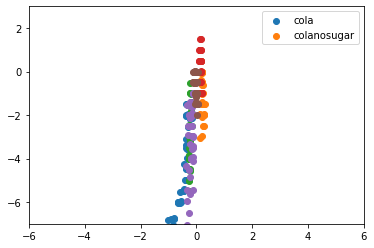

In [7]:
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_cola.joblib')

cnt = 0
correctcnt = 0

ds = [1, 7, 8]
matls = ['cola', 'colanosugar']
for d in ds:
    for matl in matls:
        df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
        diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
        diff_r = df_f['RSSI'] - df_t['RSSI']
        plt.scatter(diff_p, diff_r)
    #     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
        result = clf.predict(np.column_stack((diff_p, diff_r)))
        print(d, matl, result)
        correct = (result==matl).sum()
        print('Correct', correct/len(df_f))
        cnt += len(df_f)
        correctcnt += correct
        print('-------------------------------')
plt.legend(matls)
plt.xlim([-6, 6])
plt.ylim([-7, 3])
print(correctcnt, cnt, correctcnt/cnt)